In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
hotel = pd.read_csv(r'/Users/ilkaymueller/Documents/GitHub/Data_Analysis_Projects/Booking_hotel/hotel_bookings.csv')

In [3]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
hotel.shape

(119390, 32)

In [5]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

<font color=blue, size=5> Cleaning the data <font>

In [6]:
hotel.duplicated().sum()

31994

In [7]:
hotel = hotel.drop_duplicates()

In [8]:
hotel.shape

(87396, 32)

In [9]:
filter1 = (hotel['adults']==0) & (hotel['children']==0) & (hotel['babies']==0)

In [10]:
filter1

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 87396, dtype: bool

In [11]:
hotel = hotel[~filter1]

In [12]:
hotel.shape

(87230, 32)

# Descriptive

In [13]:
hotel[['lead_time', 'total_of_special_requests', 'adr']].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0


In [14]:
for col in ['lead_time', 'total_of_special_requests', 'adr']:
    print('feature name: {}'.format(col))
    
    for i in range(90,101,1):
        quantile_value = np.quantile(hotel[col], q = 50/100)
        print('{}th value is {}'.format(i, quantile_value))
    print('\n')

feature name: lead_time
90th value is 49.0
91th value is 49.0
92th value is 49.0
93th value is 49.0
94th value is 49.0
95th value is 49.0
96th value is 49.0
97th value is 49.0
98th value is 49.0
99th value is 49.0
100th value is 49.0


feature name: total_of_special_requests
90th value is 0.0
91th value is 0.0
92th value is 0.0
93th value is 0.0
94th value is 0.0
95th value is 0.0
96th value is 0.0
97th value is 0.0
98th value is 0.0
99th value is 0.0
100th value is 0.0


feature name: adr
90th value is 98.2
91th value is 98.2
92th value is 98.2
93th value is 98.2
94th value is 98.2
95th value is 98.2
96th value is 98.2
97th value is 98.2
98th value is 98.2
99th value is 98.2
100th value is 98.2




# Spatial Analysis

In [15]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
not_cancelled = hotel[hotel['is_canceled']==0]

In [17]:
country_wise = not_cancelled['country']
country_wise

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 63221, dtype: object

In [18]:
country_wise = not_cancelled['country'].value_counts().reset_index()

In [19]:
country_wise.columns = ['country', 'num_guests']

In [20]:
country_wise

,country,num_guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [21]:
#pip install chart-studio
#pip install plotly

import chart_studio.plotly as py

import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot


init_notebook_mode(connected=True)

In [22]:
map_guest = px.choropleth(data_frame = country_wise , 
              locations= country_wise['country'] , 
              color=country_wise['num_guests'] , 
              hover_name=country_wise['country'] , 
              title= "Home country of Guests"
          
             )

In [23]:
map_guest.show()

# Do people get the room they booked? 

In [24]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
table = pd.crosstab(index = hotel['reserved_room_type'], columns = hotel['assigned_room_type'], margins = True)
table

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,All
reserved_room_type,,,,,,,,,,,,
A,45850,892,1253,6402,1034,390,176,94,205,140,0,56436
B,106,872,0,5,2,2,8,0,0,1,0,996
C,5,2,866,6,4,2,10,9,10,0,0,914
D,295,27,32,15979,657,199,82,9,67,29,0,17376
E,15,2,6,22,5458,383,97,4,40,9,0,6036
F,6,14,0,4,31,2636,113,3,10,3,0,2820
G,5,1,2,0,4,14,1999,7,15,3,0,2050
H,0,0,0,1,0,0,10,579,6,0,0,596
L,1,1,1,0,0,1,0,1,0,0,1,6


In [26]:
table_pct = pd.crosstab(index = hotel['reserved_room_type'], columns = hotel['assigned_room_type'], margins = True, normalize = 'index').round(2)*100
table_pct

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


In [27]:
table.style.background_gradient()

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,All
reserved_room_type,,,,,,,,,,,,
A,45850,892,1253,6402,1034,390,176,94,205,140,0,56436
B,106,872,0,5,2,2,8,0,0,1,0,996
C,5,2,866,6,4,2,10,9,10,0,0,914
D,295,27,32,15979,657,199,82,9,67,29,0,17376
E,15,2,6,22,5458,383,97,4,40,9,0,6036
F,6,14,0,4,31,2636,113,3,10,3,0,2820
G,5,1,2,0,4,14,1999,7,15,3,0,2050
H,0,0,0,1,0,0,10,579,6,0,0,596
L,1,1,1,0,0,1,0,1,0,0,1,6


In [28]:
#darker colors are number of bookings that they got the room they booked.
#for example, 56436 people booked A, got 45850 of them the A

# Bookings by market segment

In [29]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [30]:
hotel['market_segment'].value_counts()

Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: market_segment, dtype: int64

In [31]:
a = hotel['market_segment'].value_counts().index
b = hotel['market_segment'].value_counts().values

In [32]:
fig = px.pie(hotel, names= a, values =b, title = 'Market Segment')
fig.show()

# ADR (average daily rate) of different rooms for each segment 

In [33]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<AxesSubplot:xlabel='market_segment', ylabel='adr'>

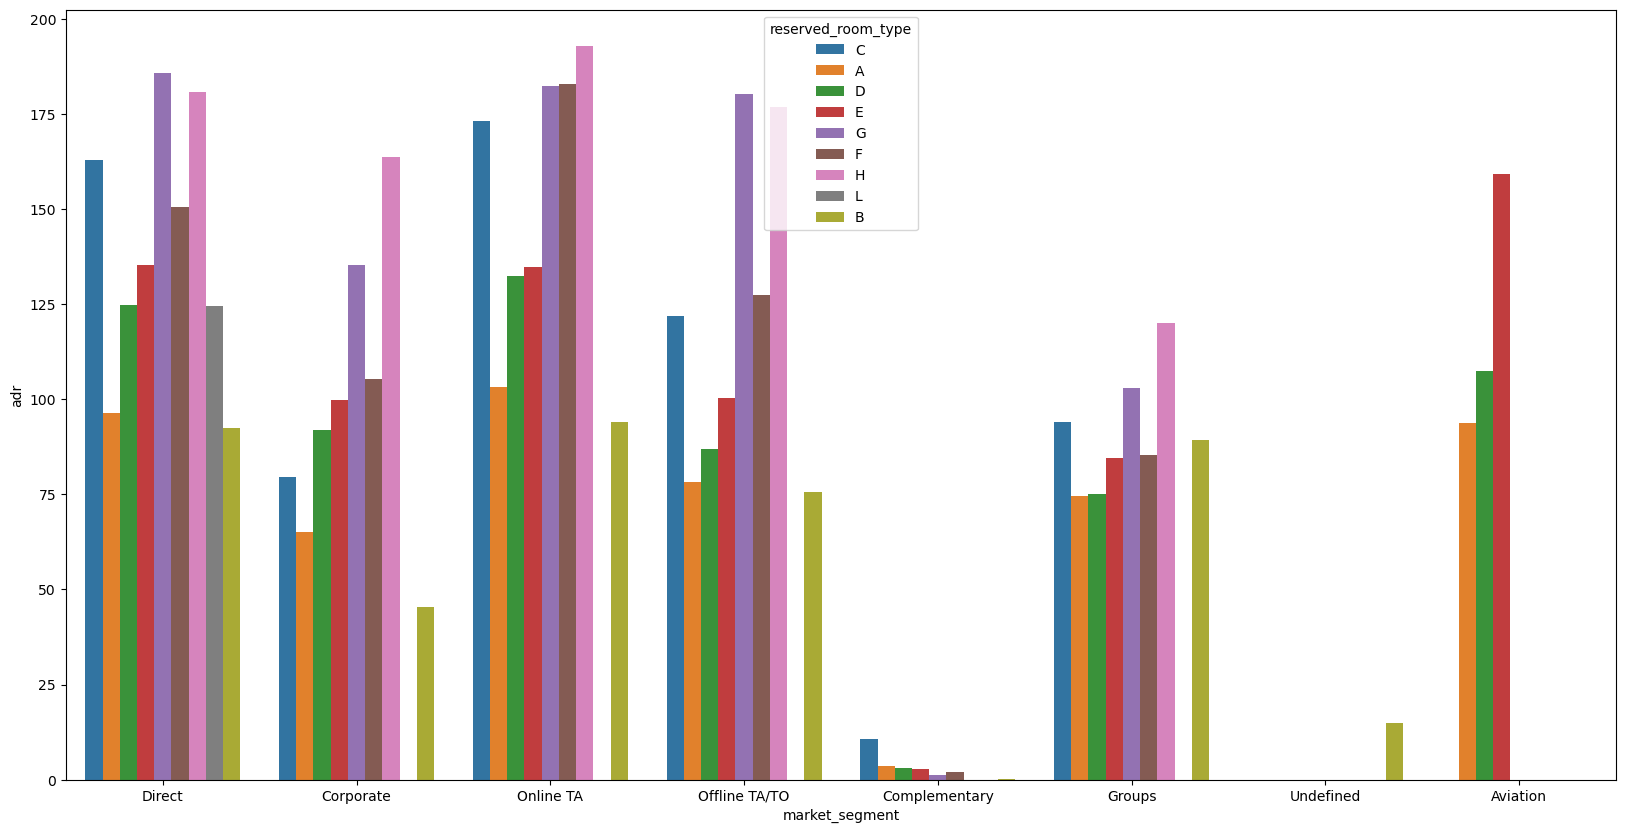

In [34]:
plt.figure(figsize= (20,10))
sns.barplot(x='market_segment', 
            y = 'adr', hue = 'reserved_room_type', 
            data = hotel, 
            ci = None, 
            saturation=0.75)

# total guest arrivals

In [35]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [36]:
hotel['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [37]:
dict_month = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}

In [38]:
hotel['arrival_date_month_index'] = hotel['arrival_date_month'].map(dict_month)

In [39]:
hotel[['arrival_date_year', 'arrival_date_month_index', 'arrival_date_day_of_month']]

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1
...,...,...,...
119385,2017,8,30
119386,2017,8,31
119387,2017,8,31
119388,2017,8,31


In [40]:
hotel['arrival date']= hotel['arrival_date_year'].astype(str)+ '/' + hotel['arrival_date_month_index'].astype(str)+ '/' + hotel['arrival_date_day_of_month'].astype(str)

In [41]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_index,arrival date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015/7/1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015/7/1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,7,2015/7/1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,7,2015/7/1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015,7,2015/7/1


In [42]:
hotel['total guests'] = hotel['adults'] + hotel['children'] + hotel['babies']

In [43]:
not_cancelled_guests = hotel[hotel['is_canceled'] == 0]

In [44]:
guest_arrival = not_cancelled_guests.groupby(['arrival date'])['total guests'].sum()
guest_arrival

arrival date
2015/10/1     149.0
2015/10/10    167.0
2015/10/11    123.0
2015/10/12    186.0
2015/10/13    115.0
              ...  
2017/8/5      205.0
2017/8/6      199.0
2017/8/7      287.0
2017/8/8      191.0
2017/8/9      185.0
Name: total guests, Length: 793, dtype: float64

<AxesSubplot:xlabel='arrival date'>

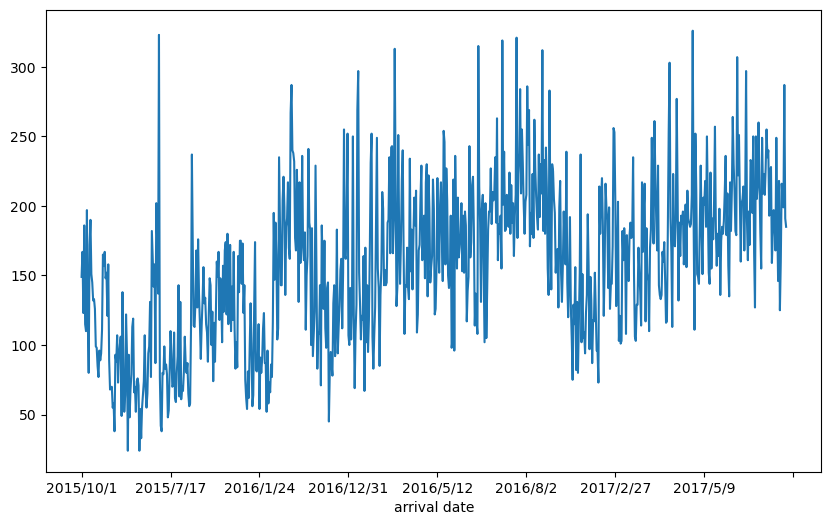

In [45]:
guest_arrival.plot(figsize =(10,6))

/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='total guests', ylabel='Density'>

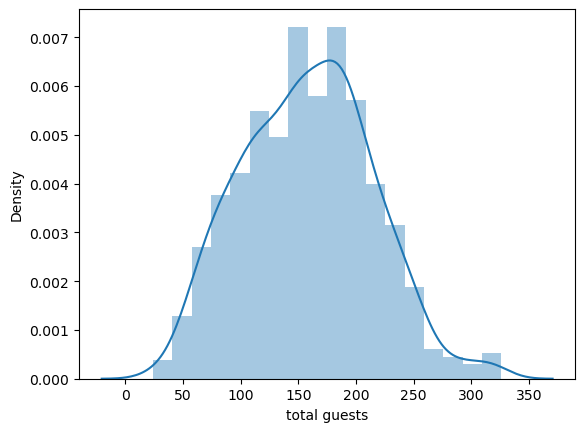

In [46]:
sns.distplot(guest_arrival)

<AxesSubplot:xlabel='total guests', ylabel='Count'>

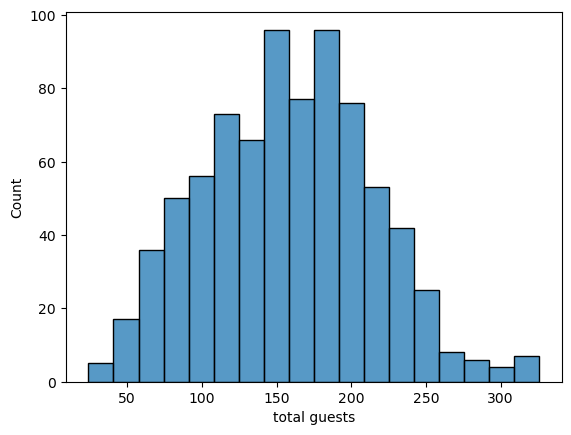

In [47]:
sns.histplot(guest_arrival)

/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

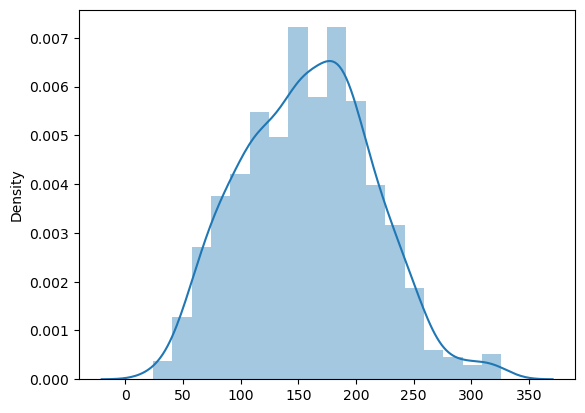

In [48]:
sns.distplot(guest_arrival.values)

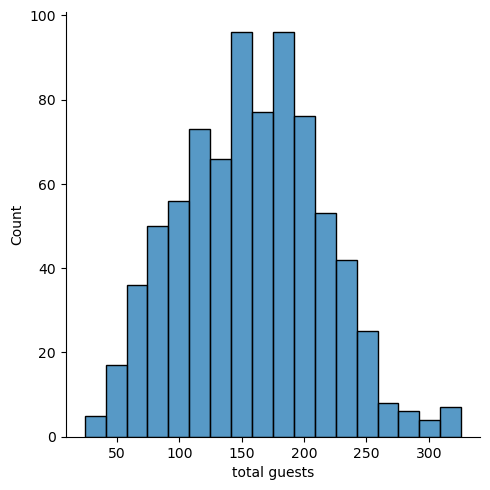

In [49]:
sns.displot(guest_arrival)

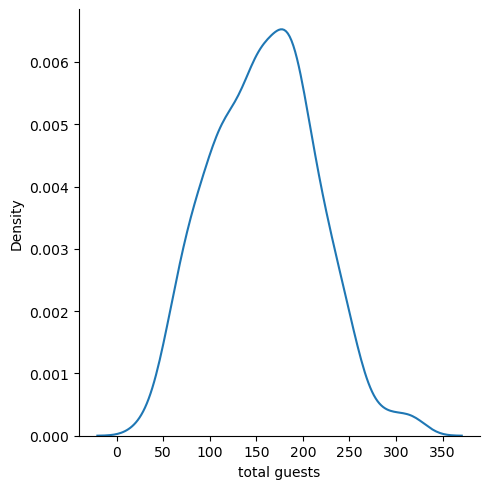

In [50]:
sns.displot(guest_arrival, kind = 'kde')